In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
MD_x = (data.iloc[:,0:11])
MD_x = (MD_x == "Yes") + 0
print(np.round((np.mean(MD_x)),2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


C:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [7]:
# Principle Component Analysis
from sklearn.decomposition import PCA

In [8]:
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display PCA summary and components
print(pd.DataFrame({'Standard deviation': np.sqrt(MD_pca.explained_variance_),'Proportion of variance': MD_pca.explained_variance_ratio_, 'Cumulative Proportion:': np.cumsum(MD_pca.explained_variance_ratio_)}))

    Standard deviation  Proportion of variance  Cumulative Proportion:
0             0.757050                0.299447                0.299447
1             0.607456                0.192797                0.492244
2             0.504619                0.133045                0.625290
3             0.398799                0.083096                0.708386
4             0.337405                0.059481                0.767866
5             0.310275                0.050300                0.818166
6             0.289697                0.043849                0.862015
7             0.275122                0.039548                0.901563
8             0.265251                0.036761                0.938323
9             0.248842                0.032353                0.970677
10            0.236903                0.029323                1.000000


In [9]:
print("Standard deviations:")
print(np.round(MD_pca.explained_variance_, 1))
print("\nProportion of Variance:")
print(np.round(MD_pca.explained_variance_ratio_, 1))
print("\nCumulative Proportion:")
print(np.round(np.cumsum(MD_pca.explained_variance_ratio_), 1))

Standard deviations:
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Proportion of Variance:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Cumulative Proportion:
[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


In [10]:
loadings = MD_pca.components_.T

# Convert to DataFrame for better readability
loadings_df = pd.DataFrame(loadings, index=data.iloc[:,0:11].columns, columns=[f'PC{i+1}' for i in range(MD_pca.n_components_)])
print(loadings_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

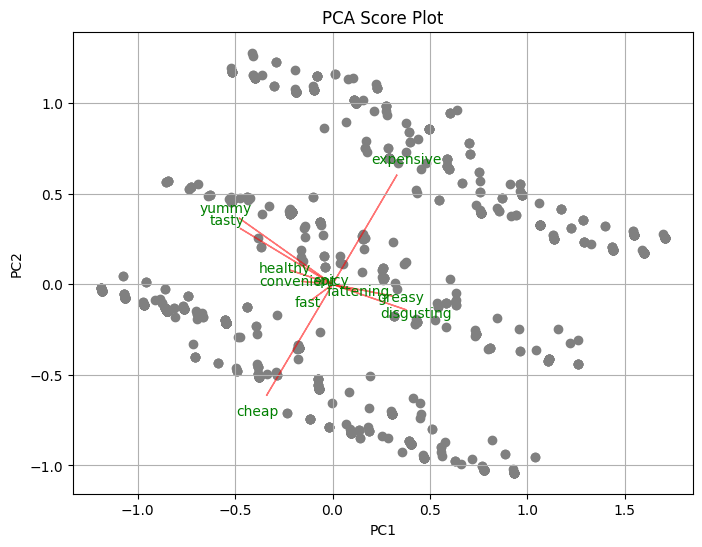

In [11]:
scores = MD_pca.fit_transform(MD_x)
# Plot the scores
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Score Plot')

# Add projection axes (loadings)
loadings = MD_pca.components_.T
for i, feature in enumerate(data.iloc[:,0:11].columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.grid()
plt.show()

In [12]:
from sklearn.cluster import KMeans

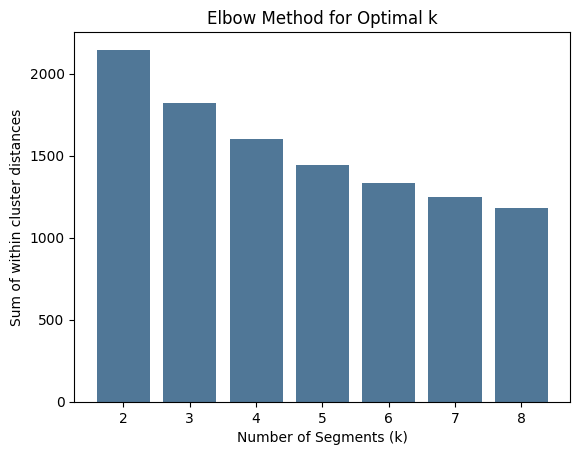

In [13]:
# Perform k-means clustering with k values from 2 to 8
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.bar(k_values, inertia_values, color='#063e6b', alpha=0.7)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of within cluster distances')
plt.show()

In [14]:
from sklearn.metrics import adjusted_rand_score

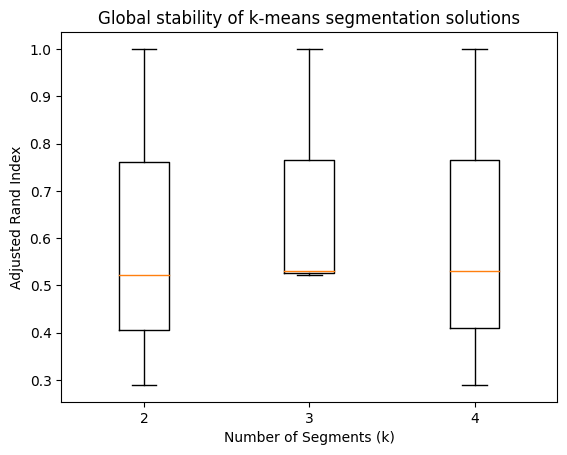

In [15]:
# Performing k-Means clustering for k values ranging from 2 to 8
results = {}
for k in range(2, 5):
    kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=1234)
    model = kmeans_model.fit(MD_x)
    kmeans_labels = model.labels_
    results[str(k)] = kmeans_labels
    data['Cluster Number'] = kmeans_labels

# Calculating adjusted rand index for each k value
ari_values = []
for k1 in range(2, 5):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 5)])

# Convert ari_values to a NumPy array for easier plotting
ari_values = np.array(ari_values)

# Create a box plot
plt.boxplot(ari_values.T, labels=list(range(2, 5)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global stability of k-means segmentation solutions')
plt.show()

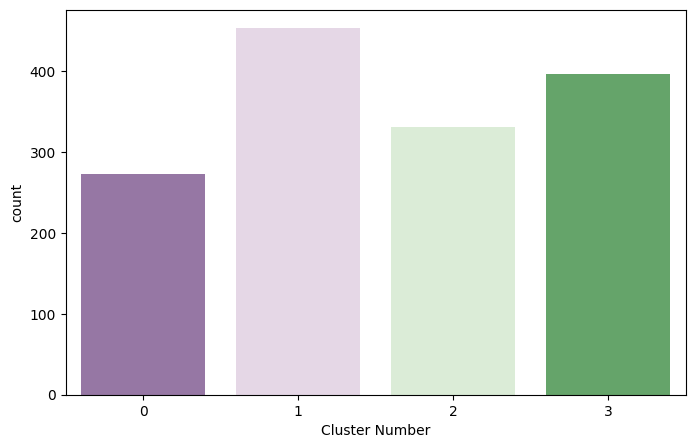

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x = data["Cluster Number"], palette = 'PRGn')
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
columns = ["iter", "converged", "k", "k0", "logLik", "AIC", "BIC"]
results = pd.DataFrame(columns=columns)
X = np.array(MD_x)

# Perform Latent Class Analysis (LCA) using Gaussian Mixture Model
for k in range(2, 9):
    lca_model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    lca_model.fit(X)
    
    # Get log-likelihood and other metrics
    log_likelihood = lca_model.score(X)
    aic = lca_model.aic(X)
    bic = lca_model.bic(X)
    
    # Append the results to the DataFrame
    results = results.append({"iter": lca_model.n_iter_,"converged": True, "k": k, "k0": k, "logLik": log_likelihood,  "AIC": aic, "BIC": bic}, ignore_index=True)

print(results)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6688\813223799.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"iter": lca_model.n_iter_,"converged": True, "k": k, "k0": k, "logLik": log_likelihood,  "AIC": aic, "BIC": bic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6688\813223799.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"iter": lca_model.n_iter_,"converged": True, "k": k, "k0": k, "logLik": log_likelihood,  "AIC": aic, "BIC": bic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6688\813223799.py:16: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({"iter": lca_mode

  iter converged  k k0     logLik           AIC           BIC
0    7      True  2  2   7.672279 -21985.641850 -21167.027072
1    9      True  3  3   8.693053 -24796.011705 -23565.448845
2   14      True  4  4  12.580946 -35938.230203 -34295.719261
3   13      True  5  5  13.010694 -37031.077685 -34976.618661
4   12      True  6  6  17.082544 -48707.873657 -46241.466552
5   13      True  7  7  17.334778 -49284.866011 -46406.510825
6   12      True  8  8  19.544096 -55549.143202 -52258.839934


C:\Users\DELL\AppData\Local\Temp\ipykernel_6688\813223799.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"iter": lca_model.n_iter_,"converged": True, "k": k, "k0": k, "logLik": log_likelihood,  "AIC": aic, "BIC": bic}, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6688\813223799.py:16: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({"iter": lca_model.n_iter_,"converged": True, "k": k, "k0": k, "logLik": log_likelihood,  "AIC": aic, "BIC": bic}, ignore_index=True)


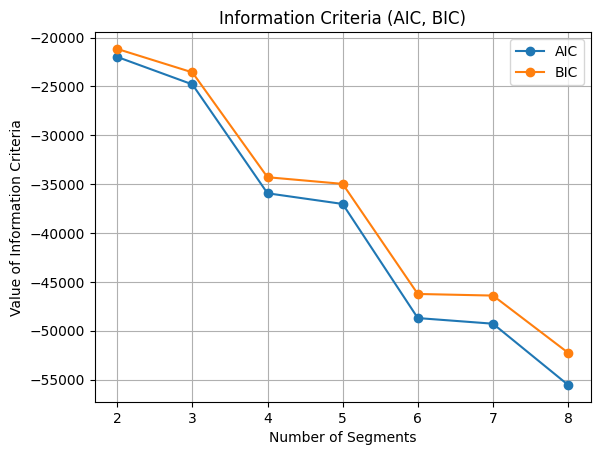

In [19]:
# We plot the information criteria with a customised label for the y-axis to
# choose a suitable number of segments

# Extract the number of segments (k-values) and corresponding AIC, BIC,
# and ICL values from the MD_m28 DataFrame
num_segments = results["k"]
AIC_values = results["AIC"]
BIC_values = results["BIC"]

# Create a line plot for each information criterion, using the number of segments as x-axis
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC)')

# Add a legend to the plot to identify each line
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Select the model for k=4
selected_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
selected_model.fit(MD_x)

# Cross-tabulation of clusters from k-means and the mixture model
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

cluster_comparison = pd.crosstab(index=kmeans_labels, columns=selected_model.predict(MD_x), rownames=['kmeans'], colnames=['mixture'])
print(cluster_comparison)

mixture    0   1   2    3
kmeans                   
0        449   1  42   21
1        288  36   6   37
2          0  87   2  153
3          0   8  76  247


In [21]:
logLikelihood = selected_model.score_samples(MD_x)
print(f'Log Likelihood: {logLikelihood.sum()}')

Log Likelihood: 18280.115101343403


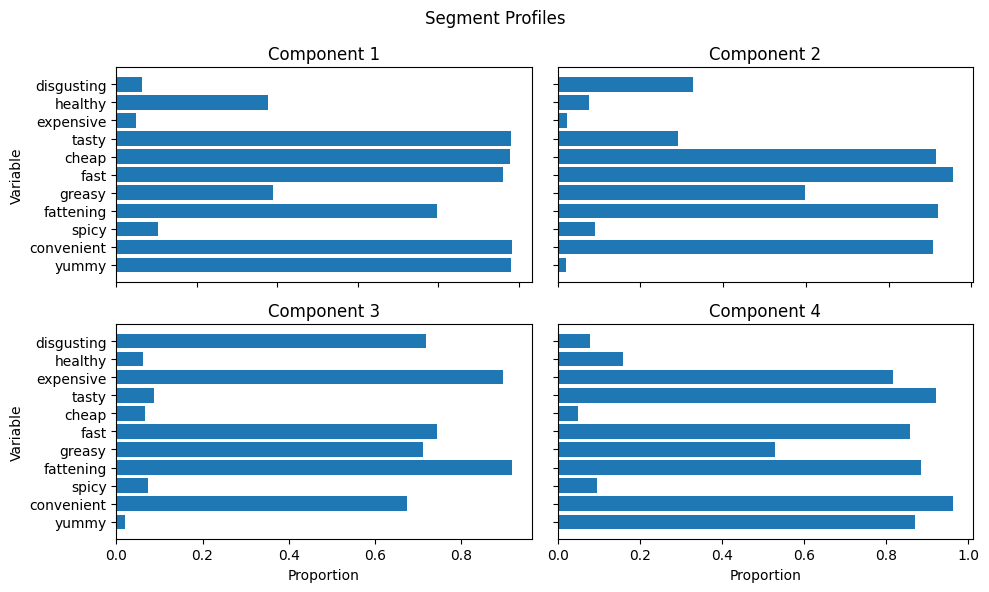

In [22]:
# Select the k-means model with 4 clusters (MD_km28['4'])
kmeans = kmeans_model

# Get the cluster labels assigned by the k-means model
labels = kmeans.labels_

# Group the data 'MD' by the cluster labels and calculate the mean of each cluster
MD_mean = MD_x.groupby(labels).mean()

# Create a 2x2 subplot figure with a size of 10x6 inches
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Create horizontal bar plots for each cluster's mean values on separate subplots
# and set titles for each subplot accordingly
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set common labels and ticks for all subplots
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

# Hide labels on inner subplots
for ax in axs.flat:
    ax.label_outer() 
    
fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

In [23]:
crosstab =pd.crosstab(data['Cluster Number'],data['Like'])
crosstab = crosstab[['-4','-3','-2','-1','0','+1','+2','+3','+4']]
crosstab

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
Cluster Number,,,,,,,,,
0,27,30,19,13,45,22,15,13,4
1,2,2,3,4,31,41,69,121,93
2,37,37,28,22,55,35,35,16,2
3,5,4,9,19,38,54,68,79,61


In [24]:
from statsmodels.graphics.mosaicplot import mosaic

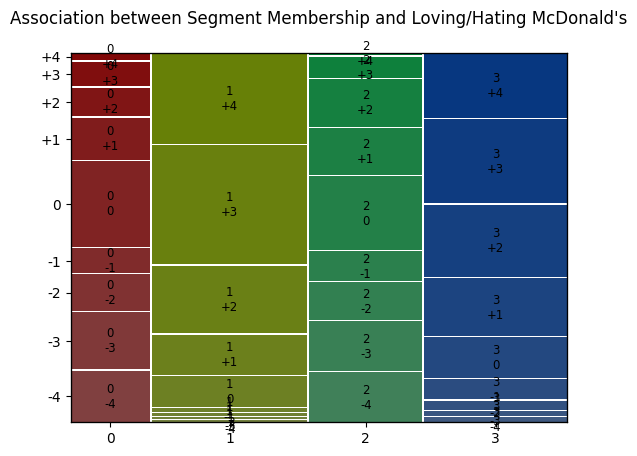

In [25]:
mosaic(crosstab.stack(), title='Association between Segment Membership and Loving/Hating McDonald\'s\n')
plt.show()

In [26]:
GenderCrossTab = pd.crosstab(data['Cluster Number'],data['Gender'])
GenderCrossTab

Gender,Female,Male
Cluster Number,,
0,111,162
1,265,188
2,192,139
3,220,176


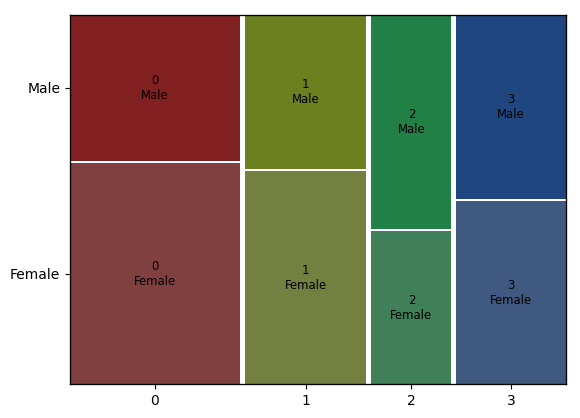

In [27]:
MD_k4 = kmeans_model
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
mosaic(ct.stack(), gap=0.01)
plt.show()

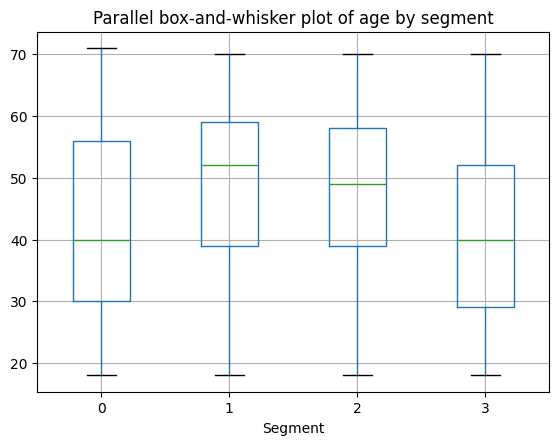

In [28]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visitFreq = data.groupby('Cluster Number')['VisitFrequency'].mean()
visitFreq = visitFreq.to_frame().reset_index()
visitFreq

,Cluster Number,VisitFrequency
0,0,2.593407
1,1,2.582781
2,2,2.734139
3,3,2.651515


In [30]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
like = data.groupby('Cluster Number')['Like'].mean()
like = like.to_frame().reset_index()
like

,Cluster Number,Like
0,0,6.208791
1,1,3.894040
2,2,5.432024
3,3,3.737374


In [31]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('Cluster Number')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,Cluster Number,Gender
0,0,0.593407
1,1,0.415011
2,2,0.419940
3,3,0.444444


In [32]:
clusters = Gender.merge(like, on='Cluster Number', how='left').merge(visitFreq, on='Cluster Number', how='left')
clusters

,Cluster Number,Gender,Like,VisitFrequency
0,0,0.593407,6.208791,2.593407
1,1,0.415011,3.894040,2.582781
2,2,0.419940,5.432024,2.734139
3,3,0.444444,3.737374,2.651515


In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

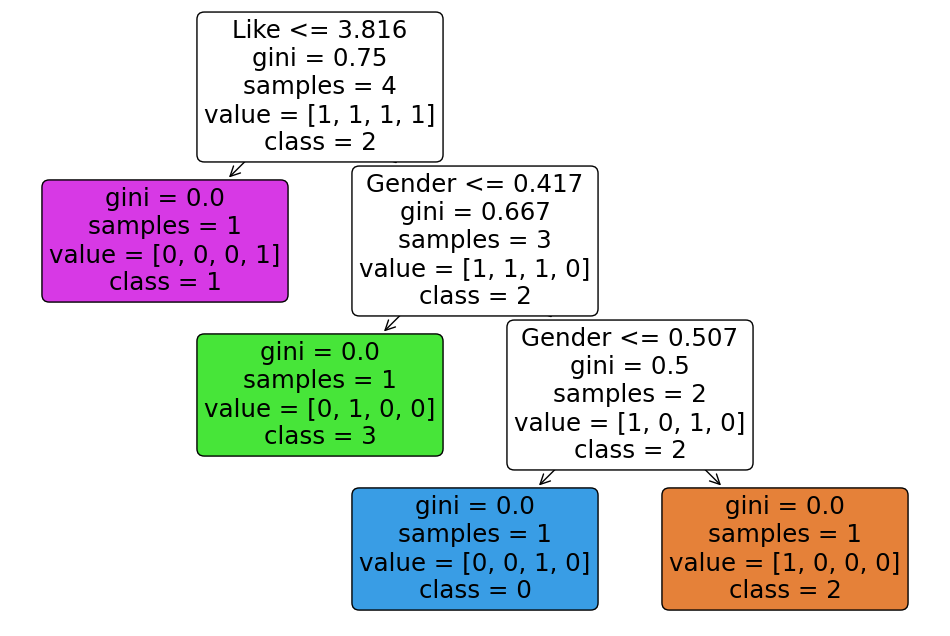

In [34]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

features = ['Like', 'VisitFrequency', 'Gender']
target = 'Cluster Number'

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(clusters[['Like', 'VisitFrequency', 'Gender']]), columns=['Like', 'VisitFrequency', 'Gender'])


# Separate features and target variable
X = data_imputed[features]  # Use the imputed data
y = clusters[target]

# Create a decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in data[target].unique()], filled=True, rounded=True)
plt.show()

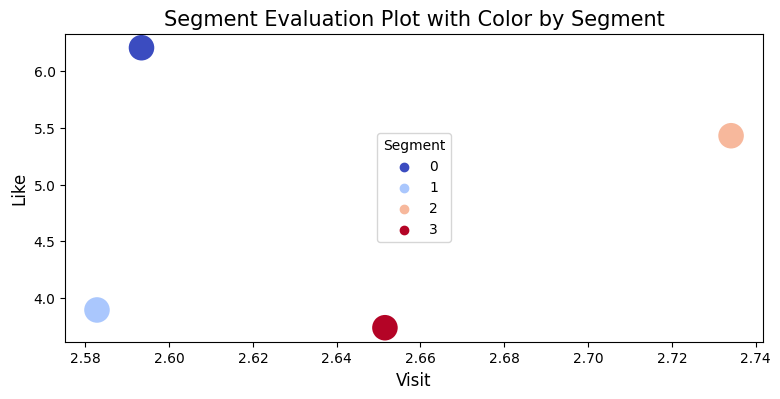

In [35]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=clusters, s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Segment Evaluation Plot with Color by Segment", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.legend(title='Segment', loc='center')
plt.show()